In [1]:
#coding:utf8
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from feature_create import create_features

In [22]:

names=['alloy','class','delta','Hmix','Smix','Fi','RMS','VEC','r','Sc','deltaHmixmax','deltaHmixmin','rootHmix','rootHmix0','rootHmix0+','rootHmix0-']

data=pd.read_csv('/Users/xutao/Nustore Files/我的坚果云/HEA/feature_tools/合并数据集-去除重复.csv',header=0,names=names)
#X=data[['delta','Hmix','Smix','Fi','RMS','VEC','r','Sc','deltaHmixmax','deltaHmixmin','rootHmix','rootHmix0','rootHmix0+','rootHmix0-']]
Y=data[["class"]]

#X=create_features(X,X)

#X_gen_fea=generate_feature(X)
#X_gen_fea.to_csv('/Users/xutao/Downloads/Python/HEA/HEA-code/generate_feature.csv',index=False)

data_generate=pd.read_csv('/Users/xutao/Downloads/Python/HEA/HEA-code/generate_feature.csv')
X=data_generate
print(X.shape)
print(Y.shape)

(407, 54810)
(407, 1)


In [23]:
#将含有NaN的列(columns)去掉:
#X =X.dropna(axis=1)
#print(X_new.shape)
print(Y.shape)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,Y)
X_new = lda.transform(X)
print(X_new.shape)
coef=lda.coef_
print("权重向量：",coef,'\n',"权重向量长度：",len(lda.coef_))
print("权重向量shape:",coef.shape)
#print("迭代次数:",lda.n_iter_)
print("intercept:",lda.intercept_)
print("截距长度：",len(lda.intercept_))

#print(X_new)
# pca=PCA(n_components=15)
# pca.fit(X_new)
# X_new=pca.transform(X_new) #PCA进行降维

print("finish")

(407, 1)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(407, 2)
权重向量： [[-5.22856057e+02 -1.09889306e+02  9.54416361e+02 ... -3.81118693e+03
  -2.88729484e+03 -9.65029645e+02]
 [ 2.91181613e+03 -6.02186259e+01 -4.73160567e+03 ...  2.32936101e+04
   2.18555514e+04  9.54443383e+03]
 [ 1.84409234e+03 -1.03477746e+03 -5.33030002e+03 ...  3.92445970e+04
   2.28677964e+04  2.70443244e+02]
 [-4.75562500e+02  6.92571657e-02  8.04173021e+02 ... -3.61505152e+03
  -2.95000679e+03 -8.40243434e+02]
 [-2.68383619e+02  3.87366875e+02  8.30838933e+02 ... -9.36245400e+03
  -7.42748713e+03 -2.68696238e+03]] 
 权重向量长度： 5
权重向量shape: (5, 54810)
intercept: [ -17160.32952305  230919.17934722 -684277.4488166   -25589.39239419
   92766.85890088]
截距长度： 5
finish


In [ ]:
a=np.array([[1,2,3]])
b=np.array([[1],[2],[3]])
#矩阵相乘:
print(np.dot(b,a))

In [24]:
# print(X_new.shape)
# X_new=pd.DataFrame(X_new)
# print(type(Y),type(X_new))
#print(X_new)
#print(Y.corr(X_new))

x_train,x_test,y_train,y_test=train_test_split(X_new,Y,test_size=0.3, random_state=1)

# 将原始特征，转换为新的特征
# x_train = model.transform(x_train)
# x_test = model.transform(x_test)

print("\ny_test:")
print(y_test['class'].value_counts())

print("\ny_train:")
print(y_train['class'].value_counts())

print("finish")


y_test:
4    71
5    21
2    13
1    11
3     7
Name: class, dtype: int64

y_train:
4    166
5     42
1     37
2     30
3      9
Name: class, dtype: int64
finish


In [25]:
mnb=MultinomialNB()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier(n_estimators=10)
svc=SVC(C=1, kernel='rbf', gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False)
gnb = GaussianNB()
LR=LogisticRegression()

#reshape  y_train的形状:
c, r = y_train.shape 
y_train=y_train.values
y_train= y_train.reshape(c, )
print("finish")

finish


In [26]:
#mnb.fit(x_train,y_train)
knc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
gbc.fit(x_train,y_train)
abc.fit(x_train,y_train)
svc.fit(x_train,y_train)
gnb.fit(x_train,y_train)
LR.fit(x_train,y_train)

#y_predict_mnb=mnb.predict(x_test)
y_predict_knc=knc.predict(x_test)
y_predict_dtc=dtc.predict(x_test)
y_predict_rfc=rfc.predict(x_test)
y_predict_gbc=gbc.predict(x_test)
y_predict_abc=abc.predict(x_test)
y_predict_svc=svc.predict(x_test)
y_predict_gnb=gnb.predict(x_test)
y_predict_lr=LR.predict(x_test)
print("finish")

finish


In [27]:
from sklearn.metrics import classification_report

print('\n1:')
print("DTC confusioin_matrix:\n",confusion_matrix(y_test,y_predict_dtc))
print("\nKNC confusioin_matrix:\n",confusion_matrix(y_test,y_predict_knc))
print("\nRFC confusioin_matrix:\n",confusion_matrix(y_test,y_predict_rfc))
print("\nGBC confusioin_matrix:\n",confusion_matrix(y_test,y_predict_gbc))
print("\nAda confusioin_matrix:\n",confusion_matrix(y_test,y_predict_abc))
print("\nSVC confusioin_matrix:\n",confusion_matrix(y_test,y_predict_svc))
print("\nLR confusioin_matrix:\n",confusion_matrix(y_test,y_predict_lr))

print("1:","KNC:",knc.score(x_test,y_test),'DTC:',dtc.score(x_test,y_test),"RFC:",rfc.score(x_test,y_test),"GBC:",gbc.score(x_test,y_test),\
"Ada:",abc.score(x_test,y_test),"SVC:",svc.score(x_test,y_test),"GauNB:",gnb.score(x_test,y_test),\
"LR:",LR.score(x_test,y_test))





1:
DTC confusioin_matrix:
 [[11  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 71  0]
 [ 0  0  0  0 21]]

KNC confusioin_matrix:
 [[11  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 71  0]
 [ 0  0  0  0 21]]

RFC confusioin_matrix:
 [[10  0  0  1  0]
 [ 0 13  0  0  0]
 [ 0  0  7  0  0]
 [ 1  0  0 70  0]
 [ 0  0  0  0 21]]

GBC confusioin_matrix:
 [[11  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 71  0]
 [ 0  0  0  0 21]]

Ada confusioin_matrix:
 [[ 0  0  0 11  0]
 [ 0 13  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 70  1]
 [ 0  0  0  0 21]]

SVC confusioin_matrix:
 [[ 9  0  0  2  0]
 [ 0 12  0  1  0]
 [ 0  0  7  0  0]
 [ 0  0  0 71  0]
 [ 0  0  0  0 21]]

LR confusioin_matrix:
 [[ 0  0  0 11  0]
 [ 0 13  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0 71  0]
 [ 0  0  0  0 21]]
1: KNC: 1.0 DTC: 1.0 RFC: 0.983739837398374 GBC: 1.0 Ada: 0.9024390243902439 SVC: 0.975609756097561 GauNB: 0.991869918699187 LR: 0.9105691056910569


(407, 2)
(407, 1)
<class 'pandas.core.frame.DataFrame'>
407
(407, 1)


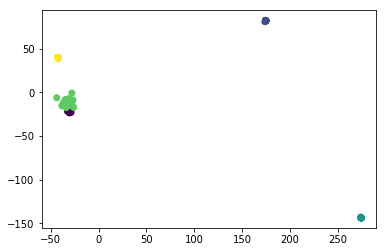

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(X_new.shape)
print(Y.shape)
print(type(Y))
print(len(Y))
Y=pd.DataFrame(Y)
print(Y.shape)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=np.squeeze(Y))
plt.show()